In [110]:
import tifffile as tf 
import zarr 
import palom
# import pillow
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.spatial import ConvexHull, Delaunay
import pickle
import os
import time
# import torch
# import torch.nn as nn
from tqdm.auto import tqdm
import numpy as np
import tifffile as tf
import zarr
import dask.array as da
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import cellcutter
import cellcutter.cli
from numcodecs import Blosc
# import logging
# logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)
# logging.debug("test")

In [111]:
# # old_df = pd.read_csv('/Users/swarchol/Downloads/seal480/objects.csv')
# # old_df
# df = pd.read_csv('/Users/swarchol/Research/seal/data/astro/updated_astro_merged.csv')

In [112]:
CSV_PATH = '/Users/swarchol/Research/seal/data/astro/updated_astro_merged.csv'

In [113]:
# CSV_PATH = '/Users/swarchol/Research/seal/data/astro/updated_astro_merged.csv'
# merged_df.to_csv('/Users/swarchol/Research/seal/data/astro/updated_astro_merged.csv', index=False)


MainProcess 2025-04-09 15:58:45,628 WARNING: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.22045898..266.5].


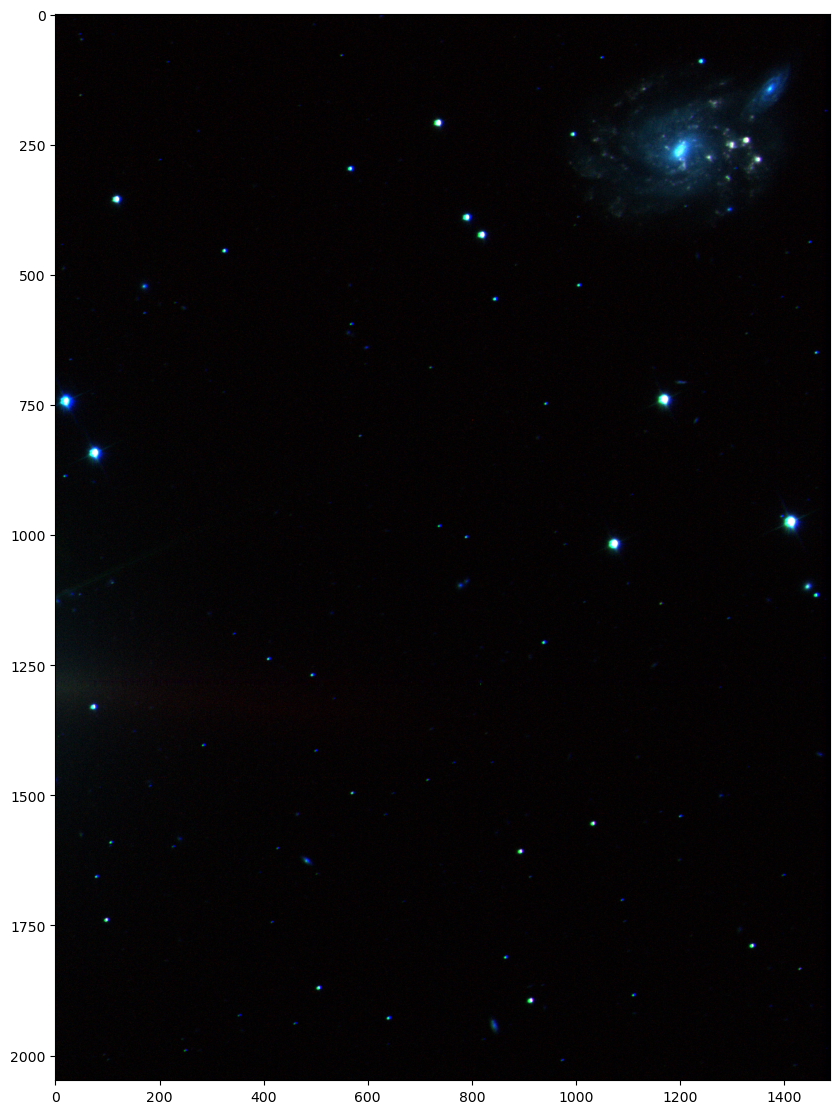

In [114]:

df = pd.read_csv(CSV_PATH)
features = df
# load numpy arrays and stack them
image_channels = np.stack([np.load(f'/Users/swarchol/Downloads/seal480/filter-{feature}.npy') for feature in ['u', 'g', 'r', 'i', 'z']])
fig, axs = plt.subplots(1, 1, figsize=(10, 20))
# visualize first 3 channels as rgb
first_3_channels = image_channels[0:3, :, :]
# flip so channels are last
first_3_channels = np.transpose(first_3_channels, (1, 2, 0))
axs.imshow(first_3_channels)

# sdss_df = pd.read_csv('/Users/swarchol/sdss_results.csv')

In [115]:
# df = pd.read_csv(CSV_PATH)
# old_df = pd.read_csv('/Users/swarchol/Downloads/seal480/objects.csv')

# # df.to_csv('/Users/swarchol/Research/seal/data/astro/updated_astro_merged.csv', index=False)


In [116]:
# df[df['objid'] == 1237666338116273022]

(array([8.375538e+06, 1.331296e+06, 1.121763e+06, 8.706460e+05,
        6.087070e+05, 6.250270e+05, 3.202200e+05, 2.634450e+05,
        2.292490e+05, 1.657880e+05, 1.303130e+05, 1.299260e+05,
        1.024370e+05, 7.006500e+04, 7.527300e+04, 8.222800e+04,
        5.031500e+04, 4.569900e+04, 7.146200e+04, 4.009200e+04,
        3.138000e+04, 6.001300e+04, 3.217800e+04, 2.595800e+04,
        4.318400e+04, 2.883600e+04, 1.904200e+04, 3.110600e+04,
        2.373700e+04, 1.491800e+04, 1.769200e+04, 2.431300e+04,
        1.108300e+04, 1.125400e+04, 1.989000e+04, 8.309000e+03,
        7.612000e+03, 1.440300e+04, 6.395000e+03, 5.239000e+03,
        1.028300e+04, 5.035000e+03, 3.290000e+03, 7.866000e+03,
        4.396000e+03, 2.511000e+03, 3.682000e+03, 5.169000e+03,
        1.626000e+03, 2.527000e+03, 4.199000e+03, 1.402000e+03,
        1.529000e+03, 3.164000e+03, 1.158000e+03, 9.470000e+02,
        2.810000e+03, 8.090000e+02, 7.380000e+02, 2.080000e+03,
        8.480000e+02, 5.180000e+02, 1.18

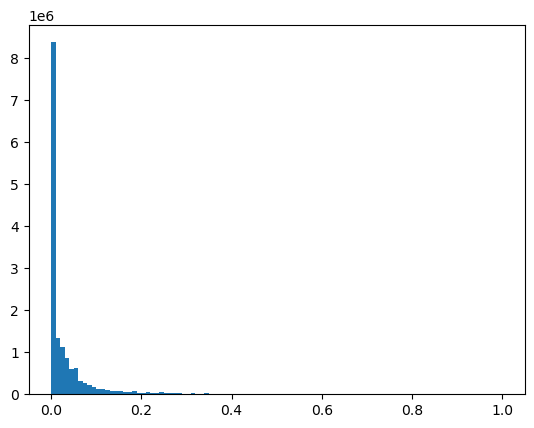

In [117]:
# plt.hist(image_channels.flatten(), bins=100)
image_channels = np.clip(image_channels, 0, 1)
plt.hist(image_channels.flatten(), bins=100)

In [118]:
# Clip values to 0-255
image_channels = np.clip(image_channels, 0, 1)
float_image_channels = image_channels.astype(np.float32)

In [119]:

image_array = float_image_channels
# plot the first 100 channels



In [120]:
seg_masks = np.load('/Users/swarchol/Downloads/seal480/seg_masks.npy')

In [121]:
df['temp_index']
df['CellID'] = df['temp_index']
df = df.drop(columns=['temp_index'])

In [122]:
features = df 



In [123]:
cell_ids = df['CellID'].unique()
missing_cell_ids = []
# Remove cellId == 1378 from features

cell_ids = df['CellID'].unique()
for cell_id in cell_ids:
    row = df[df['CellID'] == cell_id]
    # Find indicies in seg_masks that are equal to cell_id
    cell_mask = seg_masks == cell_id
    # Check if cellid is not in seg_masks
    if cell_id not in seg_masks:
        print(f"CellID {cell_id} not in seg_masks")
        missing_cell_ids.append(cell_id)
        continue

    # Find the centroid of the cell by the mean pixel coordinates
    centroid_x = np.mean(np.where(cell_mask)[1])
    centroid_y = np.mean(np.where(cell_mask)[0])
    
    


    features.loc[features['CellID'] == cell_id, 'X_centroid'] = centroid_x
    features.loc[features['CellID'] == cell_id, 'Y_centroid'] = centroid_y

features




CellID 155 not in seg_masks
CellID 744 not in seg_masks


,objid,RUN,RERUN,CAMCOL,FIELD,ID,type,RA,DEC,u,...,nMgyPerCount_i,nMgyPerCount_z,TAI_u,TAI_g,TAI_r,TAI_i,TAI_z,CellID,X_centroid,Y_centroid
0,1.240000e+18,2708,301,1,234,22,6,18.752891,-0.978412,18.18845,...,0.006763,0.031552,4512258628,4512258771,4512258484,4512258556,4512258699,150,75.030612,1331.153061
1,1.240000e+18,2708,301,1,234,36,3,18.748518,-0.973636,14.58587,...,0.006758,0.031572,4512258626,4512258769,4512258483,4512258554,4512258698,138,36.000000,1287.000000
2,1.240000e+18,2708,301,1,234,53,3,18.745173,-0.956080,24.63399,...,0.006765,0.031609,4512258626,4512258769,4512258482,4512258554,4512258697,216,4.945205,1127.273973
3,1.240000e+18,2708,301,1,234,57,3,18.748183,-0.954625,24.63132,...,0.006766,0.031574,4512258626,4512258770,4512258483,4512258555,4512258698,154,32.641026,1114.487179
4,1.240000e+18,2708,301,1,234,70,6,18.747031,-0.913746,15.86924,...,0.006772,0.031648,4512258626,4512258770,4512258483,4512258554,4512258698,117,21.531186,744.499657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1.240000e+18,4858,301,1,481,623,3,18.907381,-0.929053,23.91156,...,0.006786,0.031684,4602733303,4602733446,4602733159,4602733231,4602733374,777,1478.500000,880.214286
706,1.240000e+18,4858,301,1,481,624,6,18.907897,-0.941584,25.81512,...,0.006780,0.031718,4602733304,4602733447,4602733160,4602733232,4602733375,806,1484.000000,995.000000
707,1.240000e+18,4858,301,1,481,625,6,18.908402,-0.973699,24.86380,...,0.006759,0.031634,4602733304,4602733447,4602733160,4602733232,4602733376,832,1487.363636,1287.000000
708,1.240000e+18,4858,301,1,481,890,3,18.902960,-0.989798,22.23417,...,0.006759,0.031651,4602733304,4602733447,4602733160,4602733232,4602733376,826,1439.000000,1434.000000


In [124]:
# Remove missing_cell_ids from features
features = features[~features['CellID'].isin(missing_cell_ids)]
features.to_csv('/Users/swarchol/Research/seal/data/astro/new_objects.csv', index=False)





In [125]:
feature_columns = [
  "u",
  "g",
  "r",
  "i",
  "z",
  # "petroRad_r",  # Petrosian radius in the r-band – an estimate of the size of an object (usually a galaxy).
  #  Probability the object is a point source (i.e., star-like) based on shape. High values suggest stars, while extended objects (like galaxies) have lower values.
  "cz",
  "extinction_r",
  "airmass_r",
  'mCr4_r',
    # "expPhi_r",
]
feature_data = features[feature_columns].to_numpy()
# features[feature_columns]

In [126]:
# Drop any columns with nan values
feature_data = feature_data[:, ~np.isnan(feature_data).any(axis=0)]
feature_data.shape


(708, 9)

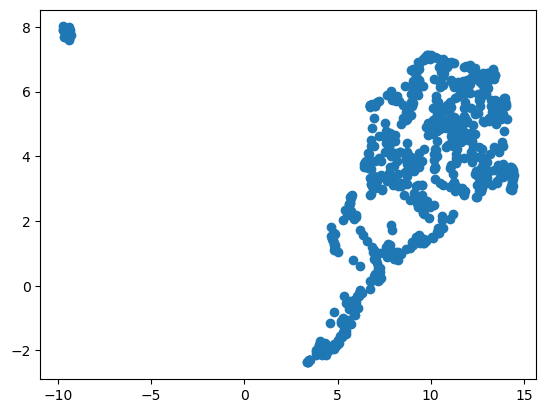

In [127]:


import umap

# # handle nan values
feature_data = np.nan_to_num(feature_data)

# fit umap on feature_columns
umap_model = umap.UMAP(n_components=2)
umap_model.fit(feature_data)

# transform the data
umap_result = umap_model.transform(feature_data)
plt.scatter(umap_result[:, 0], umap_result[:, 1])










In [128]:
# Cluster the data using kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(umap_result)

# Add the cluster labels to the features dataframe
features['cluster'] = kmeans.labels_


MainProcess 2025-04-09 15:58:59,912 WARNING: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


MainProcess 2025-04-09 15:59:00,042 WARNING: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
MainProcess 2025-04-09 15:59:00,044 WARNING: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


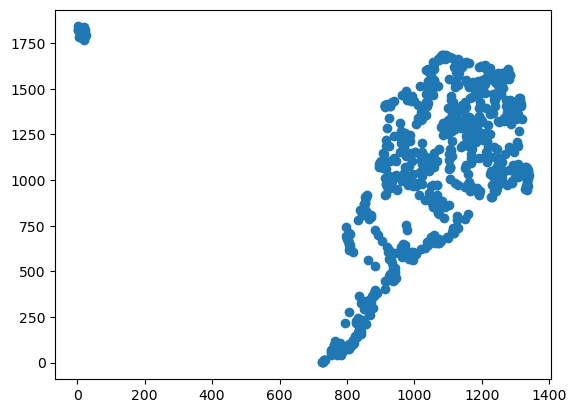

In [129]:
# X range,
x_range = features["X_centroid"].min(), features["X_centroid"].max()
y_range = features["Y_centroid"].min(), features["Y_centroid"].max()
# Scale umap_result to x_range and y_range
umap_result = (umap_result - umap_result.min(axis=0)) / (umap_result.max(axis=0) - umap_result.min(axis=0))
umap_result[:, 0] = 0.9* umap_result[:, 0] * (x_range[1] - x_range[0]) + x_range[0]
umap_result[:, 1] = 0.9 *umap_result[:, 1] * (y_range[1] - y_range[0]) + y_range[0]


plt.scatter(umap_result[:, 0], umap_result[:, 1])

features['UMAP_X'] = umap_result[:, 0]
features['UMAP_Y'] = umap_result[:, 1]
# save
features.to_csv('/Users/swarchol/Research/seal/data/astro/updated_astro.csv', index=False)









In [130]:
image_array = image_array * 65535
image_array = image_array.astype(np.uint16)
# SCALE values to 0-65535
image_array = image_array.astype(np.uint16)
# convert image_array to dask array
image_array = da.from_array(image_array)
# make this a uint16 array

In [131]:
palom.pyramid.write_pyramid(
    mosaics=[
        image_array
    ],
    output_path=r"/Users/swarchol/Research/seal/data/astro/astro.ome.tif", 
    downscale_factor=2,
    channel_names=['u', 'g', 'r', 'i', 'z']
)

2025-04-09 15:59:00.392 | INFO     | palom.pyramid:write_pyramid:166 - Writing to /Users/swarchol/Research/seal/data/astro/astro.ome.tif


Assembling mosaic  1/ 1 (channel  1/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  2/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  3/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  4/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  5/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

2025-04-09 15:59:00.472 | INFO     | palom.pyramid:write_pyramid:182 - Generating pyramid
2025-04-09 15:59:00.473 | INFO     | palom.pyramid:write_pyramid:185 -     Level 1 (1024 x 745)
Processing channel: 100%|##########| 5/5 [00:00<00:00,  6.25it/s]


In [132]:
# Write 
image_array

dask.array<array, shape=(5, 2048, 1489), dtype=uint16, chunksize=(5, 2048, 1489), chunktype=numpy.ndarray>

In [133]:
np.max(image_array.compute())

65535

In [134]:
from ome_types import from_tiff
from tifffile import tiffcomment

file_name= r"/Users/swarchol/Research/seal/data/astro/astro.ome.tif"
xml = from_tiff(file_name)
channel_names = ['u', 'g', 'r', 'i', 'z']
for i in range(len(xml.images[0].pixels.channels)):
    # 
    xml.images[0].pixels.channels[i].name = channel_names[i]

# write this back to the ome-tiff file
ome_xml = xml.to_xml()
# TIFF strings must be 7-bit ASCII
ome_xml = ome_xml.encode('utf-8')
tiffcomment(file_name, ome_xml)



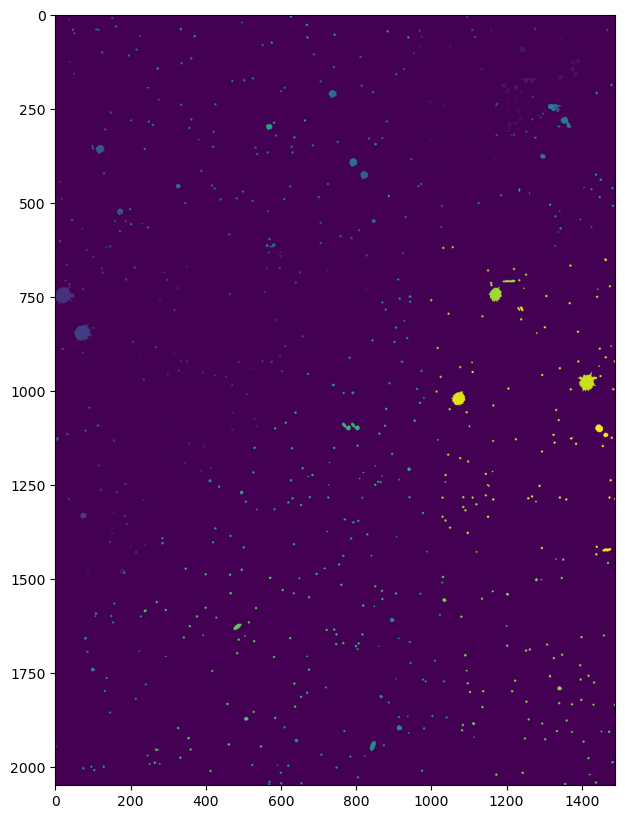

In [135]:
# show seg_masks as a 2d image as figsize 20,20
plt.figure(figsize=(10, 10))
plt.imshow(seg_masks)
plt.show()


In [136]:
seg_mask_da = da.from_array(seg_masks)
# write this to a tiff file with palom
palom.pyramid.write_pyramid(
    mosaics=[
        seg_mask_da
    ],
    is_mask=True,
    output_path=r"/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif", 
    downscale_factor=2,

)

2025-04-09 15:59:02.207 | INFO     | palom.pyramid:write_pyramid:166 - Writing to /Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif


Assembling mosaic  1/ 1 (channel  1/ 1):   0%|          | 0/2 [00:00<?, ?it/s]

2025-04-09 15:59:02.230 | INFO     | palom.pyramid:write_pyramid:182 - Generating pyramid
2025-04-09 15:59:02.231 | INFO     | palom.pyramid:write_pyramid:185 -     Level 1 (1024 x 745)
Processing channel: 100%|##########| 1/1 [00:00<00:00,  6.51it/s]


In [137]:
t1 = palom.reader.OmePyramidReader(r"/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif")
t1.pyramid

[dask.array<reshape, shape=(1, 2048, 1489), dtype=int32, chunksize=(1, 2048, 1489), chunktype=numpy.ndarray>,
 dask.array<reshape, shape=(1, 1024, 745), dtype=int32, chunksize=(1, 1024, 745), chunktype=numpy.ndarray>]

In [138]:
t2 = palom.reader.OmePyramidReader(r"/Users/swarchol/Research/seal/data/astro/astro.ome.tif")
t2.pyramid

[dask.array<from-zarr, shape=(5, 2048, 1489), dtype=uint16, chunksize=(1, 2048, 1489), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(5, 1024, 745), dtype=uint16, chunksize=(1, 1024, 745), chunktype=numpy.ndarray>]

In [139]:
image_path = "/Users/swarchol/Research/seal/data/astro/astro.ome.tif"

# segmentation_path = "/mnt/c/Users/simon/Documents/Greg/for_simon/segmentation_mask/WD-76845-097.tif"
segmentation_path = r"/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif"
# csv_path = "/mnt/c/Users/simon/Documents/Greg/for_simon/unmicst-WD-76845-097_cellRing.csv"
csv_path = "/Users/swarchol/Research/seal/data/astro/updated_astro.csv"
dest_path = "/Users/swarchol/Research/seal/data/astro/cut"

In [140]:
img = (tf.TiffFile(image_path, is_ome=False))

In [141]:
# remove existing cut directory
if os.path.exists(dest_path):
    shutil.rmtree(dest_path)
for i in tqdm(range(len(img.pages))):
    sample_path = f"{dest_path}/channel_{i}"
    args = [image_path,
    segmentation_path,
    csv_path,
    sample_path,
    "-p", "8",  # Number of processes
        "--channels", (str(i+1)),  # Specific channels to include
        "--cache-size", str(1024 * 1024 * 1024 * 4),  # Cache size
    ]
    cellcutter.cli.cut(args)
    
    
# Now Create the Mask
sample_path = f"{dest_path}/mask"
args = [image_path,
segmentation_path,
csv_path,
sample_path,
"-p", "8",  # Number of processes
    "--channels", (str(i+1)),  # Specific channels to include
    "--cache-size", str(1024 * 1024 * 1024 * 4),  # Cache size
    "--mask-cells"
    
]
cellcutter.cli.cut(args)
# Remove the mask directory but keep mask_mask
import shutil
shutil.rmtree(f"{dest_path}/mask")
shutil.move(f"{dest_path}/mask_mask", f"{dest_path}/mask")
paths_list = [f"{dest_path}/channel_{i}" for i in range(len(img.pages))]
zarr_list = [zarr.open(path) for path in paths_list]
# remove existing combined zarr
if os.path.exists(dest_path + "/combined"):
    shutil.rmtree(dest_path + "/combined")
combined_store = zarr.DirectoryStore(dest_path + "/combined")# [r.chunks for r in zarr_list]
combined = zarr.create(
            store=combined_store,
            overwrite=True,
            shape=(len(zarr_list), zarr_list[0].shape[1],zarr_list[0].shape[2],zarr_list[0].shape[3]),
            dtype=zarr_list[0].dtype,
            compressor=Blosc(cname="zstd", clevel=2, shuffle=Blosc.SHUFFLE)        )

for i in tqdm(range(len(zarr_list))):
    combined[i,:,:,:] = zarr_list[i][0]


# Remove the individual channel zarrs
for path in paths_list:
    shutil.rmtree(path)

  0%|          | 0/5 [00:00<?, ?it/s]

MainProcess 2025-04-09 15:59:02,469 INFO: Namespace(p=8, z=False, force=False, window_size=None, mask_cells=False, channels=[1], cache_size=4294967296, chunk_size=32, cells_per_chunk=None, IMAGE='/Users/swarchol/Research/seal/data/astro/astro.ome.tif', SEGMENTATION_MASK='/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif', CELL_DATA='/Users/swarchol/Research/seal/data/astro/updated_astro.csv', DESTINATION='/Users/swarchol/Research/seal/data/astro/cut/channel_0')
MainProcess 2025-04-09 15:59:02,476 INFO: Loading cell data
MainProcess 2025-04-09 15:59:02,494 INFO: Check if all cell IDs from the CSV are represented in the segmentation mask
MainProcess 2025-04-09 15:59:02,506 INFO: Remove cells from segmentation mask that are not present in the CSV
MainProcess 2025-04-09 15:59:02,514 INFO: Finding window size
MainProcess 2025-04-09 15:59:02,533 INFO: Window size automatically set to (53, 53)
MainProcess 2025-04-09 15:59:02,534 INFO: Found 708 cells
MainProcess 2025-04-09 15:5

  0%|          | 0/5 [00:00<?, ?it/s]

In [142]:
# Generate New Images
TILE_SIZE = 1024
DOWNSCALE_FACTOR = 2
MAX_PYRAMID_IMG_SIZE = 1024
from scipy.spatial import cKDTree
from tqdm import tqdm
import tifffile
from loguru import logger
import math
import tempfile
import shutil
SEGMENTATION_PATH = "/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif"
CSV_PATH = "/Users/swarchol/Research/seal/data/astro/updated_astro.csv"
IMAGE_PATH = "/Users/swarchol/Research/seal/data/astro/astro.ome.tif"
IM_STORE = zarr.DirectoryStore('~/imstor')
SEG_STORE = zarr.DirectoryStore('~/segstor')
CUT_SEG_CELLS_PATH = "/Users/swarchol/Research/seal/data/astro/cut/mask"
CUT_CELLS_PATH = "/Users/swarchol/Research/seal/data/astro/cut/combined"
OUTPUT_TIFF_PATH = "/Users/swarchol/Research/seal/data/astro/tiled.ome.tif"
OUTPUT_SEGMENTATION_PATH = "/Users/swarchol/Research/seal/data/astro/tiled-mask.ome.tif"
CSV_WRITE_PATH = "/Users/swarchol/Research/seal/data/astro/updated_astro.csv"


In [143]:




def create_non_occlusive_zarr(
    im_zarr_tiled,seg_zarr_tiled, cut_cells, cut_masks, csv_df, num_channels
):
    # Create list of all indices of cells in cut_cells
    cell_indices = np.arange(cut_masks.shape[0])
    np.random.seed(0)
    np.random.shuffle(cell_indices)
    for z in tqdm(range(len(im_zarr_tiled))):
        height, width = im_zarr_tiled[z].shape[-2:]
        scale_factor = 2**z

        # Pre-allocate the entire level
        seg_level_data = zarr.zeros((height, width), dtype=np.uint32)
        image_level_data = zarr.zeros(
            (num_channels, height, width), dtype=np.uint16
        )
        print(image_level_data.shape)
        binary_mask = np.zeros((height, width), dtype=np.uint8)

        for cell_index in tqdm(cell_indices):
            # Retrieve cell row
            cell_row = csv_df.loc[csv_df["CellID"] == cell_index]
            if cell_row.empty:
                continue
            cell_location = cell_row[["UMAP_X", "UMAP_Y"]].values.flatten()

            # Adjust cell_location to place the cell's center at the centroid
            cell_center_offset = (cut_masks.shape[-2] // 2, cut_masks.shape[-1] // 2)
            cell_location = ((cell_location / scale_factor) - cell_center_offset).astype(int)
            
            # Ensure cell_location does not go below 0
            cell_location = np.maximum(cell_location, 0)

            cell_x_range = min(cell_location[0] + cut_masks.shape[-2], width)
            cell_y_range = min(cell_location[1] + cut_masks.shape[-1], height)

            # Calculate slicing based on truncated ranges
            cell_slice_x = slice(cell_location[0], cell_x_range)
            cell_slice_y = slice(cell_location[1], cell_y_range)
            cut_cell_slice_x = slice(0, cell_x_range - cell_location[0])
            cut_cell_slice_y = slice(0, cell_y_range - cell_location[1])

            # Check if adding this cell to the binary mask will create a value over 1
            binary_check = (
                binary_mask[cell_slice_y, cell_slice_x]
                + cut_masks[cell_index, cut_cell_slice_y, cut_cell_slice_x]
            )
            if np.any(binary_check > 1):
                continue
            binary_mask[cell_slice_y, cell_slice_x] = binary_check

            seg_level_data[cell_slice_y, cell_slice_x] += (
                cut_masks[cell_index][cut_cell_slice_y, cut_cell_slice_x]
                * (cell_row["CellID"].values[0])
            ).astype(np.uint32)
            masked_cell = cut_masks[cell_index] * cut_cells[:, cell_index, :, :]
            image_level_data[:, cell_slice_y, cell_slice_x] += masked_cell[
                :, cut_cell_slice_y, cut_cell_slice_x
            ]

        im_zarr_tiled[z] = image_level_data
        seg_zarr_tiled[z] = seg_level_data
    return im_zarr_tiled, seg_zarr_tiled



In [144]:
# Load data
imgio = tifffile.TiffFile(IMAGE_PATH, is_ome=False)
im_zarr = zarr.open(imgio.series[0].aszarr())

segio = tifffile.TiffFile(SEGMENTATION_PATH, is_ome=False)
seg_zarr = zarr.open(segio.series[0].aszarr())

# Create temporary directories for Zarr stores

zarr.convenience.copy_store(im_zarr.store, IM_STORE, if_exists="replace")
zarr.convenience.copy_store(seg_zarr.store, SEG_STORE, if_exists="replace")

im_zarr_tiled = zarr.open(IM_STORE)
seg_zarr_tiled = zarr.open(SEG_STORE)

# if .parquet file is used, use pd.read_parquet instead
if CSV_PATH.endswith(".parquet"):
    csv_df = pd.read_parquet(CSV_PATH)
else:
    csv_df = pd.read_csv(CSV_PATH)
try:
    embedding = csv_df[["UMAP_X", "UMAP_Y"]].values
except:
    embedding = csv_df[["emb1", "emb2"]].values

embedding[:, 0] -= embedding[:, 0].min()
embedding[:, 1] -= embedding[:, 1].min()
embedding[:, 0] = embedding[:, 0] / embedding[:, 0].max()
embedding[:, 1] = embedding[:, 1] / embedding[:, 1].max()
embedding[:, 0] = embedding[:, 0] * im_zarr_tiled[0].shape[-1]
embedding[:, 1] = embedding[:, 1] * im_zarr_tiled[0].shape[-2]
csv_df["UMAP_X"] = embedding[:, 0]
csv_df["UMAP_Y"] = embedding[:, 1]
# Write embedding to csv
csv_df.to_csv(CSV_WRITE_PATH, index=False)
print(csv_df.shape)
tree = cKDTree(embedding)
# print(im_zarr_tiled[0].shape[-2:])

# Load cut cells
cut_seg_cells = zarr.open(CUT_SEG_CELLS_PATH)
cut_cells = zarr.open(CUT_CELLS_PATH)
# # # Process segmentation
im_zarr_tiled,seg_zarr_tiled = create_non_occlusive_zarr(
    im_zarr_tiled,seg_zarr_tiled, cut_cells, cut_seg_cells, csv_df, im_zarr_tiled[0].shape[0]
)


(708, 534)


  0%|          | 0/3 [00:00<?, ?it/s]

(5, 2048, 1489)


 33%|███▎      | 1/3 [00:08<00:16,  8.39s/it]

(5, 1024, 745)


 67%|██████▋   | 2/3 [00:14<00:06,  6.96s/it]

(5, 785, 628)


100%|██████████| 3/3 [00:18<00:00,  6.20s/it]


In [145]:
import dask
dask.array.from_zarr(im_zarr_tiled[0])

dask.array<from-zarr, shape=(5, 2048, 1489), dtype=uint16, chunksize=(2, 512, 373), chunktype=numpy.ndarray>

In [146]:
seg_mask_da = da.from_array(seg_masks)
# write this to a tiff file with palom
palom.pyramid.write_pyramid(
    mosaics=[
        dask.array.from_zarr(im_zarr_tiled[0])
    ],
    # is_mask=True,
    output_path=r"/Users/swarchol/Research/seal/data/astro/hybrid.ome.tif", 
        downscale_factor=2,

)

2025-04-09 15:59:26.967 | INFO     | palom.pyramid:write_pyramid:166 - Writing to /Users/swarchol/Research/seal/data/astro/hybrid.ome.tif


Assembling mosaic  1/ 1 (channel  1/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  2/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  3/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  4/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  5/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

2025-04-09 15:59:27.409 | INFO     | palom.pyramid:write_pyramid:182 - Generating pyramid
2025-04-09 15:59:27.409 | INFO     | palom.pyramid:write_pyramid:185 -     Level 1 (1024 x 745)
Processing channel: 100%|##########| 5/5 [00:00<00:00,  6.95it/s]


In [147]:
seg_mask_da = da.from_array(seg_masks)
# write this to a tiff file with palom
palom.pyramid.write_pyramid(
    mosaics=[
        dask.array.from_zarr(seg_zarr_tiled[0])
    ],
    is_mask=True,
    output_path=r"/Users/swarchol/Research/seal/data/astro/hybrid.mask.ome.tif", 
        downscale_factor=2,

)

2025-04-09 15:59:28.150 | INFO     | palom.pyramid:write_pyramid:166 - Writing to /Users/swarchol/Research/seal/data/astro/hybrid.mask.ome.tif


Assembling mosaic  1/ 1 (channel  1/ 1):   0%|          | 0/32 [00:00<?, ?it/s]

2025-04-09 15:59:28.181 | INFO     | palom.pyramid:write_pyramid:182 - Generating pyramid
2025-04-09 15:59:28.181 | INFO     | palom.pyramid:write_pyramid:185 -     Level 1 (1024 x 745)
Processing channel: 100%|##########| 1/1 [00:00<00:00,  8.67it/s]


In [148]:
from ome_types import from_tiff
from tifffile import tiffcomment

file_name= r"/Users/swarchol/Research/seal/data/astro/hybrid.ome.tif"
xml = from_tiff(file_name)
channel_names = ['u', 'g', 'r', 'i', 'z']
for i in range(len(xml.images[0].pixels.channels)):
    # 
    xml.images[0].pixels.channels[i].name = channel_names[i]

# write this back to the ome-tiff file
ome_xml = xml.to_xml()
# TIFF strings must be 7-bit ASCII
ome_xml = ome_xml.encode('utf-8')
tiffcomment(file_name, ome_xml)

## Compute Shap Values


In [149]:
csv_df = pd.read_csv(CSV_WRITE_PATH)
csv_df

,objid,RUN,RERUN,CAMCOL,FIELD,ID,type,RA,DEC,u,...,TAI_g,TAI_r,TAI_i,TAI_z,CellID,X_centroid,Y_centroid,cluster,UMAP_X,UMAP_Y
0,1.240000e+18,2708,301,1,234,22,6,18.752891,-0.978412,18.18845,...,4512258771,4512258484,4512258556,4512258699,150,75.030612,1331.153061,4,837.416386,47.412605
1,1.240000e+18,2708,301,1,234,36,3,18.748518,-0.973636,14.58587,...,4512258769,4512258483,4512258554,4512258698,138,36.000000,1287.000000,2,1.299069,2025.426137
2,1.240000e+18,2708,301,1,234,53,3,18.745173,-0.956080,24.63399,...,4512258769,4512258482,4512258554,4512258697,216,4.945205,1127.273973,4,1037.416182,520.434153
3,1.240000e+18,2708,301,1,234,57,3,18.748183,-0.954625,24.63132,...,4512258770,4512258483,4512258555,4512258698,154,32.641026,1114.487179,1,1175.808257,779.087352
4,1.240000e+18,2708,301,1,234,70,6,18.747031,-0.913746,15.86924,...,4512258770,4512258483,4512258554,4512258698,117,21.531186,744.499657,4,809.707975,5.608444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,1.240000e+18,4858,301,1,481,623,3,18.907381,-0.929053,23.91156,...,4602733446,4602733159,4602733231,4602733374,777,1478.500000,880.214286,3,1327.556205,1377.951841
704,1.240000e+18,4858,301,1,481,624,6,18.907897,-0.941584,25.81512,...,4602733447,4602733160,4602733232,4602733375,806,1484.000000,995.000000,3,1403.502055,1766.991226
705,1.240000e+18,4858,301,1,481,625,6,18.908402,-0.973699,24.86380,...,4602733447,4602733160,4602733232,4602733376,832,1487.363636,1287.000000,3,1417.660610,1773.945575
706,1.240000e+18,4858,301,1,481,890,3,18.902960,-0.989798,22.23417,...,4602733447,4602733160,4602733232,4602733376,826,1439.000000,1434.000000,1,1038.054956,1107.835965


In [150]:
# feature_columns = ['u', 'g', 'r', 'i', 'z']

In [151]:
columns = csv_df.columns
columns
feature_data = csv_df[feature_columns].to_numpy()

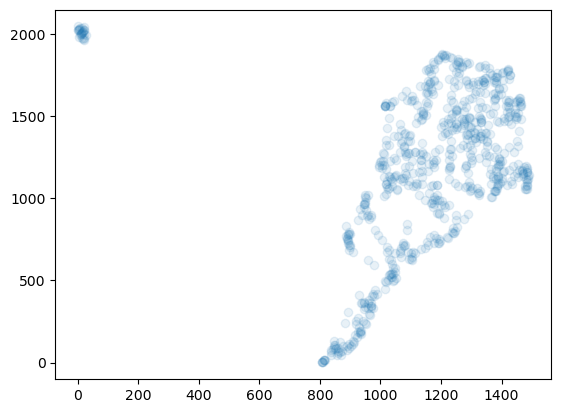

In [152]:
# # plt.scatter(csv_df['UMAP_X'], csv_df['UMAP_Y'])
regressor = xgb.XGBRegressor(
                 n_estimators=100,
                 max_depth=6)

regressor.fit(feature_data, csv_df[['UMAP_X','UMAP_Y']])
xgb_preds = regressor.predict(feature_data)
plt.scatter(xgb_preds[:,0], xgb_preds[:,1], alpha=0.1)
explainer = shap.Explainer(regressor)
shap_values = explainer(feature_data)




In [153]:
shap_values = np.abs(shap_values.values)
alphabetical_features = sorted(feature_columns)
indices = [feature_columns.index(feature) for feature in alphabetical_features]
indices
# shap_values = shap_values[:, alphabetical_features]
alphabetical_shap_values = shap_values[:, indices]
np.save('/Users/swarchol/Research/seal/data/astro.shap.npy', alphabetical_shap_values)

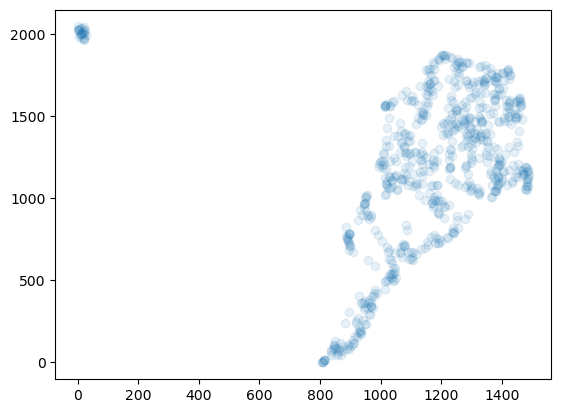

In [154]:

points = csv_df[['UMAP_X', 'UMAP_Y']]

# plot the points
plt.scatter(points['UMAP_X'], points['UMAP_Y'], alpha=0.1)
plt.show()






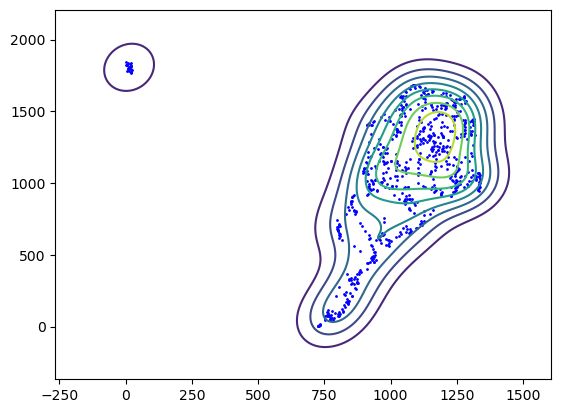

In [155]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st

# data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 400)
x = features['UMAP_X']
y = features['UMAP_Y']
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()

# Expand the area to ensure contours are complete
xmin_expanded = xmin - (xmax - xmin) * 0.2  # 10% expansion on both sides
xmax_expanded = xmax + (xmax - xmin) * 0.2
ymin_expanded = ymin - (ymax - ymin) * 0.2
ymax_expanded = ymax + (ymax - ymin) * 0.2

# Peform the kernel density estimate with expanded area
xx, yy = np.mgrid[xmin_expanded:xmax_expanded:1024j, ymin_expanded:ymax_expanded:1024j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)
import matplotlib.contour as mcontour
fig, ax = plt.subplots()
contours = ax.contour(xx, yy, f, filled=False, levels=np.linspace(f.min(), f.max(), 10))
# plot the scatterplot of the points
plt.scatter(x, y, c='blue', s=1)
contour_lines = []
contours.allsegs
for seg in contours.allsegs:
    for line in seg:
        contour_lines.append(line.tolist())


In [156]:
from shapely.geometry import Point, Polygon, MultiPoint
import numpy as np
from tqdm import tqdm

# Convert the points DataFrame into a NumPy array for efficient processing
point_coords = points[['UMAP_X', 'UMAP_Y']].values
multipoints = MultiPoint(point_coords)

# Preallocate the list
points_in_contours = np.zeros(len(contour_lines), dtype=int)

for i, contour in enumerate(tqdm(contour_lines)):
    if len(contour) < 4:
        continue  # Skip small contours

    polygon = Polygon(contour)
    
    # Efficiently check which points are inside the polygon
    points_in_contours[i] = sum(polygon.contains(Point(x, y)) for x, y in point_coords)

# Convert back to list if needed
points_in_contours = points_in_contours.tolist()

100%|██████████| 11/11 [00:00<00:00, 144.89it/s]


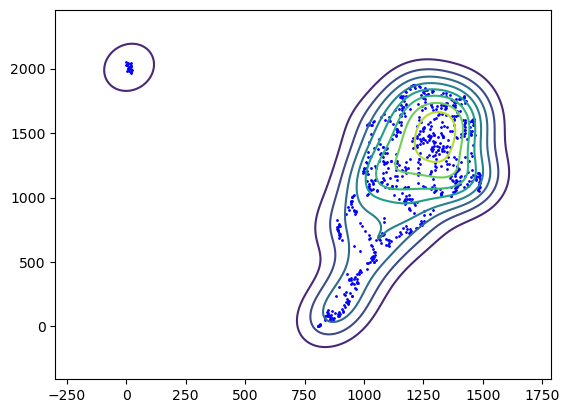

In [157]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st

# data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 400)
x = csv_df['UMAP_X']
y = csv_df['UMAP_Y']
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()

# Expand the area to ensure contours are complete
xmin_expanded = xmin - (xmax - xmin) * 0.2  # 10% expansion on both sides
xmax_expanded = xmax + (xmax - xmin) * 0.2
ymin_expanded = ymin - (ymax - ymin) * 0.2
ymax_expanded = ymax + (ymax - ymin) * 0.2

# Peform the kernel density estimate with expanded area
xx, yy = np.mgrid[xmin_expanded:xmax_expanded:1024j, ymin_expanded:ymax_expanded:1024j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)
import matplotlib.contour as mcontour
fig, ax = plt.subplots()
contours = ax.contour(xx, yy, f, filled=False, levels=np.linspace(f.min(), f.max(), 10))
# plot the scatterplot of the points
plt.scatter(x, y, c='blue', s=1)
contour_lines = []
contours.allsegs
for seg in contours.allsegs:
    for line in seg:
        contour_lines.append(line.tolist())

# Pickle the contour_lines
with open('/Users/swarchol/Research/seal/data/astro.contour.pkl', 'wb') as f:
    pickle.dump(contour_lines, f)


In [158]:
# contour_lines
# Save as json
import json


[[[-297.8, 30.42971652003905],
  [-297.8, 30.42971652003905],
  [-297.8, 30.42971652003905]],
 [[-90.2285719726282, 1955.9100684261975],
  [-90.52093013145827, 1958.7128054740958],
  [-90.78553170816754, 1961.5155425219941],
  [-91.02276755893774, 1964.3182795698926],
  [-91.23300197186371, 1967.1210166177907],
  [-91.41657322364568, 1969.9237536656892],
  [-91.57379409544762, 1972.7264907135877],
  [-91.7049523490143, 1975.5292277614858],
  [-91.81031116405067, 1978.3319648093843],
  [-91.89010953778542, 1981.1347018572824],
  [-91.94456264755777, 1983.937438905181],
  [-91.97386217718845, 1986.7401759530794],
  [-91.978176607818, 1989.5429130009775],
  [-91.95765147382109, 1992.345650048876],
  [-91.91240958433069, 1995.148387096774],
  [-91.84255121083602, 1997.9511241446726],
  [-91.74815424124452, 2000.753861192571],
  [-91.6292743007305, 2003.5565982404692],
  [-91.4859448396234, 2006.3593352883677],
  [-91.31817718851934, 2009.1620723362662],
  [-91.12596058073417, 2011.96480938